In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("./datasets_n_images/datasets_module_1/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [5]:
df.describe() # numerical

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [7]:
df['Gender']=='Female'

0      False
1      False
2       True
3       True
4       True
       ...  
195     True
196     True
197    False
198    False
199    False
Name: Gender, Length: 200, dtype: bool

In [8]:
df[df['Gender']=='Female']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


In [9]:
df['Annual Income (k$)'].loc[df['Gender'] == 'Female'].mean()

59.25

In [10]:
print("Mean of Annual Income (k$) of Female:",df['Annual Income (k$)'].loc[
    df['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",df['Annual Income (k$)'].loc[
    df['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


In [11]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [12]:
df.groupby('Gender')['Age'].mean()

Gender
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

K-Means Clustering with Scikit-Learn
-----------------------------------------------------

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)

For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps: 

(i) Find the Euclidean distance between each data instance and centroids of all the clusters; 

(ii) Assign the data instances to the cluster of the centroid with nearest distance; 

(iii) Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.

A Simple Example
--------------------------
Let's try to see how the K-means algorithm works with the help of a handcrafted example, before implementing the algorithm in Scikit-Learn.

We have a set of the following two dimensional data instances named D.

In [ ]:
D = { (5,3), (10,15), (15,12), (24,10), (30,45), (85,70), (71,80), (60,78), 
     (55,52), (80,91) }  

# We want to divide this data into two clusters, 
# C1 and C2 based on the similarity between the data points.

The first step is to randomly initialize values for the centroids of both clusters. Let's name centroids of clusters C1 and C2 as c1 and c2 and initialize them with the values of the first two data points 
i.e. (5, 3) and (10, 15).

![Iteration_1_K_means_algo](Iteration_1_K_means_algo.png 'Iteration_1_K_means_algo')

After assigning data points to the corresponding clusters, the next step is to calculate the new centroid values. These values are calculated by finding the means of the coordinates of the data points that belong to a particular cluster.

For cluster C1, there is currently only one point i.e. (5,3), therefore the mean of the coordinates remain same and the new centroid value for c1 will also be (5,3).

For C2, there are currently 9 data points. We name the coordinates of data points as x and y. The new value for x coordinate of centroid c2 can be calculated by determining the mean of x coordinates of all 9 points that belong to cluster C2 as given below:

c2(x) = (10 + 15 + 24 + 30 + 85 + 71 + 60 + 55 + 80) / 9 = 47.77  
The new value for y coordinate of centroid c2 can be calculated by determining the mean of all y coordinates of all 9 points that belong to cluster C2.

c2(y) = (15 + 12 + 10 + 45 + 70 + 80 + 78 + 52 + 91) / 9 = 50.33  

**The updated centroid value for c2 will now be {47.77, 50.33}.

For the next iteration, the new centroid values for c1 and c2 will be used and the whole process will be repeated. The iterations continue until the centroid values stop updating.

![Iteration_2_K_means_algo](Iteration_2_K_means_algo.png 'Iteration_2_K_means_algo')

c1(x) = (5, 10, 15, 24) / 4 = 13.5  
c1(y) = (3, 15, 12, 10) / 4 = 10.0 
**Updated c1 to be (13.5, 10.0).

c2(x) = (30 + 85 + 71 + 60 + 55 + 80) / 6 = 63.5  
c2(y) = (45 + 70 + 80 + 78 + 52 +91) / 6 = 69.33  
**Updated c2 to be (63.5, 69.33).

![Iteration_3_K_means_algo](Iteration_3_K_means_algo.png 'Iteration_3_K_means_algo')

c1(x) = (5, 10, 15, 24, 30) / 5 = 16.8  
c1(y) = (3, 15, 12, 10, 45) / 5 = 17.0  
**Updated c1 to be (16.8, 17.0).

c2(x) = (85 + 71 + 60 + 55 + 80) / 5 = 70.2  
c2(y) = (70 + 80 + 78 + 52 + 91) / 5 = 74.2  
**Updated c2 to be (70.2, 74.2).

![Iteration_4_K_means_algo](Iteration_4_K_means_algo.png 'Iteration_4_K_means_algo')

At the end of fourth iteration, the updated values of C1 and C2 are same as they were at the end of the third iteration. This means that data cannot be clustered any further. c1 and c2 are the centroids for C1 and C2. 

To classify a new data point, the distance between the data point and the centroids of the clusters is calculated. Data point is assigned to the cluster whose centroid is closest to the data point.

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
df.iloc[:, [3,4]].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
df.iloc[:, [3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
X = df.iloc[:, [3,4]].values

In [17]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [18]:
type(X)

numpy.ndarray

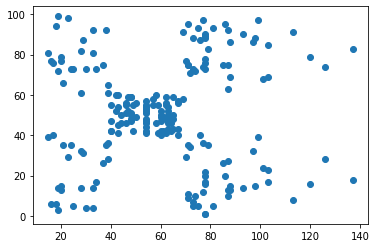

In [19]:
# Visualize
plt.scatter( X[:,0], X[:,1] )
plt.show();

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[79.6        50.12727273]
 [37.28888889 50.28888889]]


In [22]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


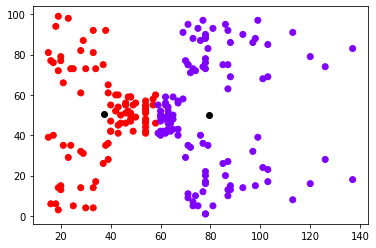

In [24]:
# Visualize
plt.scatter( X[:,0], X[:,1], c=kmeans.labels_ , cmap='rainbow' )
plt.scatter( kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black' )
plt.show();

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [87.         18.63157895]
 [44.15447154 49.82926829]]


In [35]:
print(kmeans.inertia_)

106348.37306211118


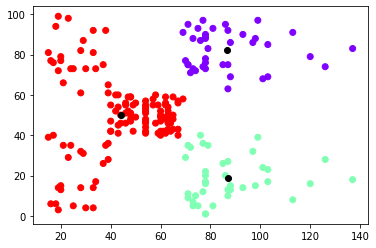

In [34]:
# Visualize
plt.scatter( X[:,0], X[:,1], c=kmeans.labels_ , cmap='rainbow' )
plt.scatter( kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black' )
plt.show();

To implement K-Means clustering, we need to look at the Elbow Method.
The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset. The following figure demonstrates the elbow method :

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,
                  random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

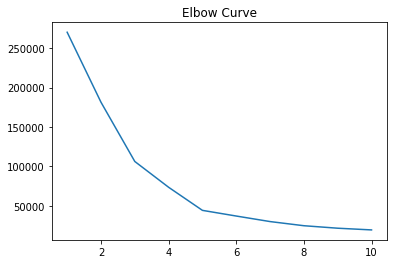

In [36]:
# In above cell if you refer the documentation, all the parameters in KMeans()
# are set to default. So lets remove them
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

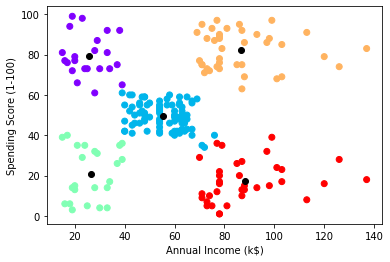

In [38]:
# execute K-means algorithm with 5 clusters and see the output graph
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
# let's plot the points along with the centroid coordinates 
# of each cluster to see how the centroid positions effects clustering.
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], 
            color='black')  
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,
         random_state=0)
 y_kmeans=kmeans.fit_predict(X)